In [115]:
import pandas
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [116]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [117]:
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t}) 

,cos,sin,t
0,0.960170,0.279415,-6.000000
1,0.609977,0.792419,-5.368421
2,0.024451,0.999701,-4.736842
3,-0.570509,0.821291,-4.105263
4,-0.945363,0.326021,-3.473684
5,-0.955488,-0.295030,-2.842105
6,-0.596979,-0.802257,-2.210526
7,-0.008151,-0.999967,-1.578947
8,0.583822,-0.811882,-0.947368
9,0.950551,-0.310567,-0.315789


In [118]:
# Manipulating Data
data.shape    # 40 rows and 8 columns

(40, 8)

In [119]:
# Columns of a data frame
data.columns  # It has columns 

Index([u'Unnamed: 0', u'Gender', u'FSIQ', u'VIQ', u'PIQ', u'Weight', u'Height',
       u'MRI_Count'],
      dtype='object')

In [121]:
print data['Gender'].head(10)

0    Female
1      Male
2      Male
3      Male
4    Female
5    Female
6    Female
7    Female
8      Male
9      Male
Name: Gender, dtype: object


In [122]:
# Simpler selector
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

In [123]:
#splitting a dataframe on values of categorical variables:
groupby_gender = data.groupby('Gender')

In [124]:
#groupby_gender is a powerful object that exposes many operations on the resulting group of dataframes:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [125]:
#What is the mean value for VIQ for the full population?
data['VIQ'].mean()

112.35

In [126]:
#How many males/females were included in this study?
data['Gender'].value_counts()

Male      20
Female    20
Name: Gender, dtype: int64

In [127]:
#What is the average value of MRI counts expressed in log units, for males and females?
groupby_gender['MRI_Count'].mean()

Gender
Female    862654
Male      954855
Name: MRI_Count, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000122E6BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001BEA76A0>]], dtype=object)

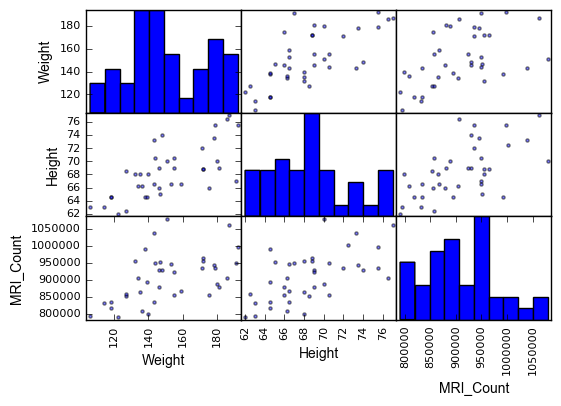

In [128]:
#Plot scatter matrices
import matplotlib
%matplotlib inline
from pandas.tools import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']]) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001EC5F1D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001F5600B8>]], dtype=object)

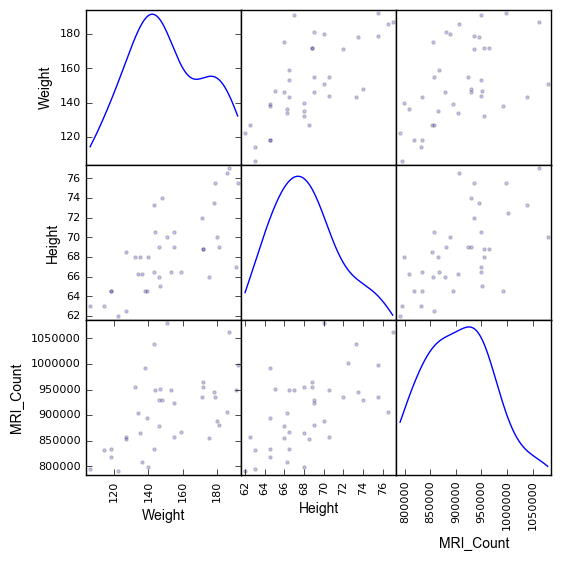

In [129]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data[['Weight', 'Height', 'MRI_Count']], alpha=0.2, figsize=(6, 6), diagonal='kde')

## Hypothesis testing: comparing two groups

###  Student’s t-test: the simplest statistical test

 #### Student’s t-test: the simplest statistical test

In [130]:
# Test if mean of random sample is equal to true mean, and different mean.
# We reject the null hypothesis in the second case and don't reject it in
# the first case.

from scipy import stats
stats.ttest_1samp(data['VIQ'], 0)
# This is a two-sided test for the null hypothesis that the expected value (mean) of a 
# sample of independent observations data['VIQ'] is equal to the given population mean, 0.
# With a p-value of 10^-28 we can claim that the population mean for the IQ (VIQ measure) is not 0. (Reject the null hypothesis)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

####  2-sample t-test: testing for difference across populations

In [131]:
print groupby_gender['VIQ'].mean()
#We have seen above that the mean VIQ in the male and female populations were different. 
#To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind():
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq) 

# With a p-value of 10^-28 we can claim that the population mean for the IQ (VIQ measure) is not 0.

Gender
Female    109.45
Male      115.25
Name: VIQ, dtype: float64


Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)

### Paired tests: repeated measurements on the same indivuals

#### PIQ, VIQ, and FSIQ give 3 measures of IQ. Let us test if FISQ and PIQ are significantly different. We can use a 2 sample test:

In [132]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)

In [133]:
#The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals.
#Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”:
stats.ttest_rel(data['FSIQ'], data['PIQ']) 

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

In [65]:
#This is equivalent to a 1-sample test on the difference:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0) 

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

In [66]:
#T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption:

stats.wilcoxon(data['FSIQ'], data['PIQ'])   

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

# Linear models, multiple factors, and analysis of variance

## A simple linear regression

In [76]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
print x
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
print y
# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})
print data.head()

[-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]
[-13.50261855 -20.86807829 -18.95479227 -19.55503238 -10.22258001
 -21.31141795  -3.54706873 -11.99219602  -6.09226467  -6.78695519
   1.63790543 -10.87214179  -2.3423004   -1.00990163   6.64034093
  -0.71535454   4.57344506   3.33067159   8.58990762  12.33126085]
          x          y
0 -5.000000 -13.502619
1 -4.473684 -20.868078
2 -3.947368 -18.954792
3 -3.421053 -19.555032
4 -2.894737 -10.222580


In [71]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [72]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Mon, 26 Dec 2016   Prob (F-statistic):           8.56e-08
Time:                        19:01:55   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

####  Categorical variables: comparing groups or multiple categories

In [79]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")

In [78]:
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Mon, 26 Dec 2016   Prob (F-statistic):              0.445
Time:                        19:07:30   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

# Multiple Regression: including multiple factors

In [80]:
data = pandas.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Mon, 26 Dec 2016   Prob (F-statistic):           1.58e-20
Time:                        19:17:29   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

Relating Gender and IQ Going back to the brain size + IQ data, test if the VIQ of male and female are different after removing the effect of brain size, height and weight. Notice that here 'Gender' is a categorical value. As it is a non-float data type, statsmodels is able to automatically infer this.

In [84]:
import pandas
from statsmodels.formula.api import ols
data = pandas.read_csv('brain_size.csv', sep=';', na_values='.')
model = ols('VIQ ~ Gender + MRI_Count + Height', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.809
Date:                Mon, 26 Dec 2016   Prob (F-statistic):             0.0184
Time:                        19:20:25   Log-Likelihood:                -172.34
No. Observations:                  39   AIC:                             352.7
Df Residuals:                      35   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        166.6258     88.824      1.

In [93]:
##############################################################################
import urllib
import os

import matplotlib.pyplot as plt
# Load the data
import pandas

if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None)
data.columns = short_names

# Log-transform the wages, because they typically are increased with
# multiplicative factors
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])


C:\Users\Nikhil\Anaconda2\lib\site-packages\ipykernel\__main__.py:32: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.


In [103]:
data.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,0.707570,35,2,6,1,1
1,9,0,1,42,0,0.694605,57,3,6,1,1
2,12,0,0,1,0,0.824126,19,3,6,1,0
3,12,0,0,4,0,0.602060,22,3,6,0,0
4,12,0,0,17,0,0.875061,35,3,6,0,1


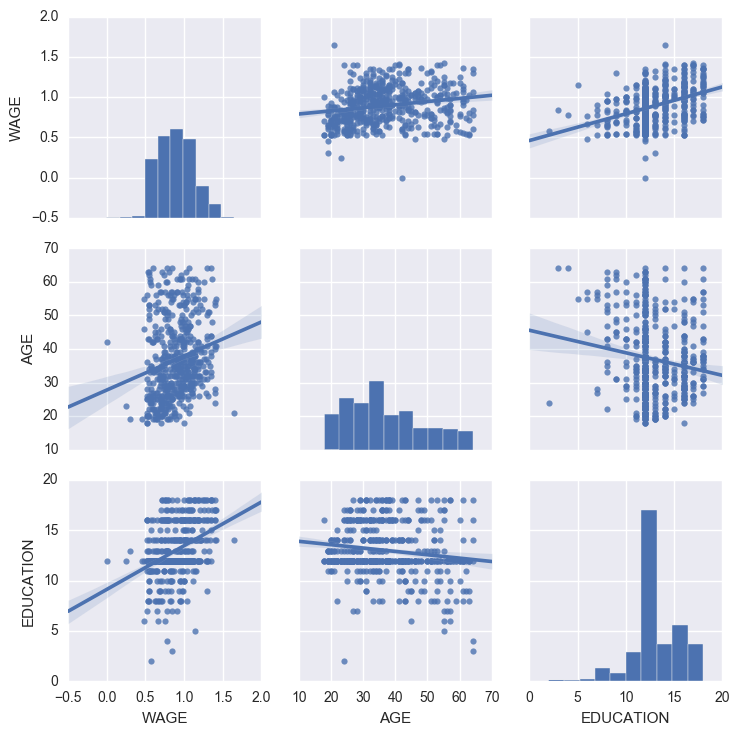

In [94]:
import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],kind='reg')

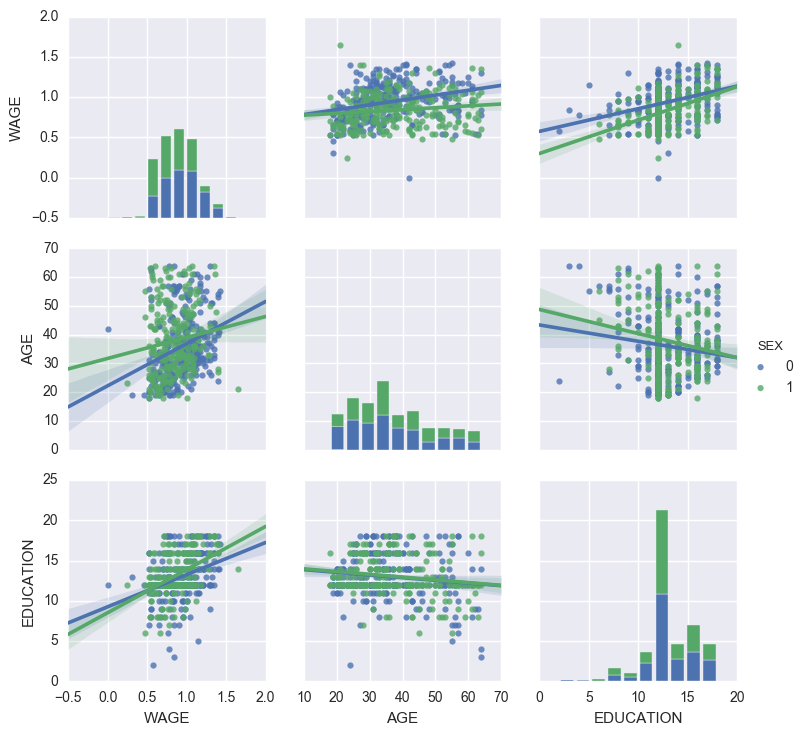

In [95]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],kind='reg', hue='SEX') 

In [96]:
from matplotlib import pyplot as plt
plt.rcdefaults()

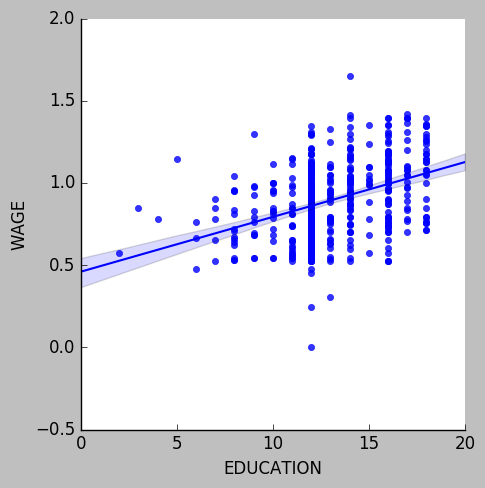

In [97]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data) 

In [112]:
#seaborn.lmplot(y='WAGE', x='EDUCATION', data=data, robust= True) ;

# Testing for interactions

In [113]:
import statsmodels.formula.api as sm
result = sm.ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX',data=data).fit()    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Mon, 26 Dec 2016   Prob (F-statistic):           2.94e-25
Time:                        19:45:53   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861